In [3]:
import sys
sys.path.insert(0, '../')
import fconcrete as fc
import numpy as np
#plt.rcParams["figure.figsize"] = (25,10)

In [85]:
import matplotlib.pyplot as plt

In [4]:
def concrete_beam_function(width, height, length):
    
    n1 = fc.Node.SimpleSupport(x=0, length=20)
    n2 = fc.Node.SimpleSupport(x=length, length=20)

    slab_area = 5*5
    kn_per_m2 = 5
    distributed_load = -slab_area*kn_per_m2/500
    f1 = fc.Load.UniformDistributedLoad(distributed_load, x_begin=0, x_end=length)
    pp = fc.Load.UniformDistributedLoad(-width*height*25/100000, x_begin=0, x_end=length)

    beam = fc.ConcreteBeam(
        loads = [f1, pp],
        nodes = [n1, n2],
        section = fc.Rectangle(width,height),
        bar_steel_max_removal = 100,
        transversal_bar_inclination_angle=90,
        available_long_steel_bars = fc.AvailableLongConcreteSteelBar(diameters=[8], max_number=500),
        available_transv_steel_bars = fc.AvailableTransvConcreteSteelBar(diameters=[6.3], space_is_multiple_of=[1]),
        available_concrete = fc.AvailableConcrete(fck=30, aggressiveness=2),
        solve_transv_steel = True,
        solve_long_steel = True,
        solve_ELS = True,
        solve_cost = True,
        verbose = False,
    )
    
    return beam

In [115]:
beam = concrete_beam_function(15, 30, 200)
self = beam

In [155]:
self = beam

x_changes = np.concatenate((self.long_steel_bars.long_begins, self.long_steel_bars.long_ends))
x_changes.sort()

for i in range(0, len(x_changes)-1):
    current_x = x_changes[i]
    next_x = x_changes[i+1]
    middle_x = (current_x+next_x)/2
    
    if (next_x > 0) and (next_x < self.length):
        transversal_position = self.long_steel_bars.getBarTransversalPosition(self, x=middle_x)
        _, beam_element = self.getBeamElementInX(middle_x)
        section = beam_element.section
    
        _, y, _, area = transversal_position.T
        y_c = (y @ area)/sum(area)
        section.d = section.height - y_c
        print(next_x)
        self.beam_elements = self.beam_elements.split(next_x)
    
    
    

    

13.14199495097003
186.85800504902997


In [160]:
for beam_element in self.beam_elements:
    print(beam_element.section.d)

24.77
24.77
24.77


In [157]:
self.beam_elements

{'bar_elements': array([{'section': <fconcrete.Structural.Section.Rectangle object at 0x12722ffd0>, 'material': <fconcrete.StructuralConcrete.Concrete.Concrete object at 0x127248160>, 'x': [{'x': 0.0, 'condition_boundary': [0, 1], 'length': 20.0}
, {'x': 13.14199495097003, 'condition_boundary': [1, 1], 'length': 0.0}
], 'E': 26838.405317753142, 'I': 33750.0, 'n1': {'x': 0.0, 'condition_boundary': [0, 1], 'length': 20.0}
, 'n2': {'x': 13.14199495097003, 'condition_boundary': [1, 1], 'length': 0.0}
, 'length': 13.14199495097003, 'flexural_rigidity': 905796179.4741685},
       {'section': <fconcrete.Structural.Section.Rectangle object at 0x12722ffd0>, 'material': <fconcrete.StructuralConcrete.Concrete.Concrete object at 0x127248160>, 'x': [{'x': 13.14199495097003, 'condition_boundary': [1, 1], 'length': 0.0}
, {'x': 186.85800504902997, 'condition_boundary': [1, 1], 'length': 0.0}
], 'E': 26838.405317753142, 'I': 33750.0, 'n1': {'x': 13.14199495097003, 'condition_boundary': [1, 1], 'length

In [121]:
middle_x

201.5667128868678

In [ ]:
beam_elements = []
nodes = self.beam_elements.nodes
for beam_element, i in zip(self.beam_elements, range(0,len(self.beam_elements)):
    beam_elements = 
    n1, n2 = self.beam_elements.nodes[i], self.beam_elements.nodes[i+1]
                           
    
    section, material = beam_element.section, beam_element.material
                           
    transversal_position = positive_bars.getBarTransversalPosition(self, x=(current_x+next_x)/2)
    _, y, _, area = transversal_position.T
    y_c = (y @ area)/sum(area)
    section.d = section.height - y_c
                           
    section.d =                  
    beam_elements = [*beam_elements, fc.BeamElement([n1, n2], section, material)]

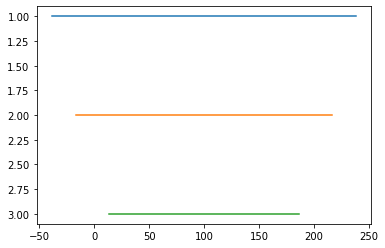

In [151]:
self.long_steel_bars.plot()

In [ ]:
transversal_position = positive_bars.getBarTransversalPosition(self, x=500)
x, y, radius, area = transversal_position.T
x_c = (x @ area)/sum(area) #should be always 0
y_c = (y @ area)/sum(area)